# Credit card fraud detection using DNN

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, f1_score, recall_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/haoxing/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/haoxing/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/haoxing/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/haoxing/.local/lib/python3.6/site-packages/tensorboard/co

In [2]:
credit_card = pd.read_csv('creditcard.csv')

In [3]:
# Create train/test
x = credit_card.drop(columns='Class', axis=1)
y = credit_card.Class.values
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.2, random_state=42)
# Standardize data can help learning
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
# Logistic regression model from the previous note
#scaler = StandardScaler()
lr = LogisticRegression()
model_lr = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model_lr.fit(x_train, y_train)
prob_lr = model_lr.predict(x_test)

/opt/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Dropout to help decrease outfitting

Srivastava, N., Hinton, G. E., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). [Dropout: a simple way to prevent neural networks from overfitting.](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) *Journal of Machine Learning Research*, 15(1), 1929-1958.

Most neural network frameworks implement dropout as a separate layer.  Dropout layers function as a regular, densely connected neural network layer.  The only difference is that the dropout layers will periodically drop some of their neurons during training.  You can use dropout layers on regular feedforward neural networks. 

![Dropout Regularization](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_9_dropout.png "Dropout Regularization")

At each training stage, individual nodes are either "dropped out" of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed. Only the reduced network is trained on the data in that stage. The removed nodes are then reinserted into the network with their original weights.

In the training stages, the probability that a hidden node will be dropped is usually 0.5; for input nodes, this should be much lower, intuitively because information is directly lost when input nodes are ignored.

At testing time after training has finished, we would ideally like to find a sample average of all possible $2^{n}$ dropped-out networks; unfortunately this is unfeasible for large values of $n$. However, we can find an approximation by using the full network with each node's output weighted by a factor of $p$, so the expected value of the output of any node is the same as in the training stages. This is the biggest contribution of the dropout method: although it effectively generates $2^{n}$ neural nets, and as such allows for model combination, at test time only a single network needs to be tested.

By avoiding training all nodes on all training data, dropout decreases overfitting. The method also significantly improves training speed. This makes the model combination practical, even for deep neural networks. The technique seems to reduce node interactions, leading them to learn more robust features that better generalize to new data. 

Animation that shows how [dropout works](https://yusugomori.com/projects/deep-learning/dropout-relu)

In [5]:
# Build the neural network
model = Sequential()
model.add(Dense(120, input_shape=(30,), activation='tanh')) # Hidden 1
model.add(Dropout(0.5))
model.add(Dense(60, activation='tanh')) # Hidden 2
model.add(Dropout(0.5))
model.add(Dense(30, activation='tanh')) # Hidden 3
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Output

model.compile(loss='binary_crossentropy', optimizer='Adam')

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.1048
Epoch 2/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 3/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0047
Epoch 4/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0052
Epoch 5/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 6/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 7/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 8/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 9/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 10/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0037


In [7]:
prob_keras = model.predict(x_test)

In [8]:
roc_auc_score(y_test, prob_keras)

0.9857597037830326

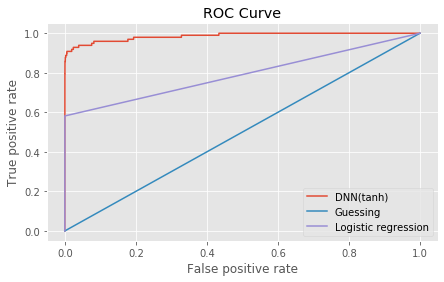

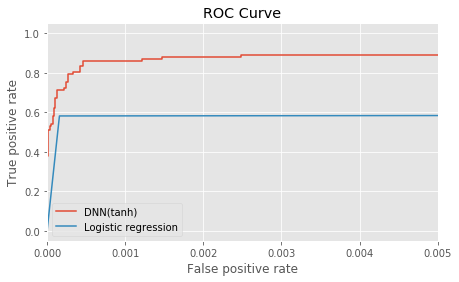

In [9]:
fpr, tpr, _ = roc_curve(y_test, prob_keras)
fp_lr, tp_lr, _ = roc_curve(y_test, prob_lr)
with plt.style.context('ggplot'):
    plt.figure(figsize=(7,4))
    plt.plot(fpr, tpr, [0,1], [0,1], fp_lr, tp_lr)
    plt.grid(True)
    plt.title('ROC Curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(['DNN(tanh)', 'Guessing', 'Logistic regression'])
    
with plt.style.context('ggplot'):
    plt.figure(figsize=(7,4))
    plt.plot(fpr, tpr, fp_lr, tp_lr)
    plt.xlim((0,0.005))
    plt.title('ROC Curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(['DNN(tanh)', 'Logistic regression'])